<a href="https://colab.research.google.com/github/rommelgutierrez/Rommel/blob/main/LE1_Gutierrez_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/localization_error.csv')


In [4]:
dataset.head()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anchor_ratio  107 non-null    int64  
 1   trans_range   107 non-null    int64  
 2   node_density  107 non-null    int64  
 3   iterations    107 non-null    int64  
 4   ale           107 non-null    float64
 5   sd_ale        107 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 5.1 KB


In [9]:
dataset.describe()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,20.523364,17.878505,159.813084,47.887850,0.983471,0.265692
std,6.739556,3.107235,71.189109,24.668874,0.408313,0.183394
min,10.000000,12.000000,100.000000,14.000000,0.394029,0.003267
25%,15.000000,15.000000,100.000000,30.000000,0.655368,0.128437
50%,18.000000,17.000000,100.000000,40.000000,0.899102,0.242423
75%,30.000000,20.000000,200.000000,70.000000,1.196418,0.362762
max,30.000000,25.000000,300.000000,100.000000,2.568407,1.092220


In [6]:
dataset.corr()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
anchor_ratio,1.000000,-0.094692,-0.116986,0.023167,-0.074997,-0.104657
trans_range,-0.094692,1.000000,-0.244055,-0.199315,0.109309,-0.076483
node_density,-0.116986,-0.244055,1.000000,-0.072426,-0.645927,-0.639097
iterations,0.023167,-0.199315,-0.072426,1.000000,-0.400394,-0.198966
ale,-0.074997,0.109309,-0.645927,-0.400394,1.000000,0.743958
sd_ale,-0.104657,-0.076483,-0.639097,-0.198966,0.743958,1.000000


In [33]:
missing_values = dataset.isnull().sum()
print( missing_values)

anchor_ratio    0
trans_range     0
node_density    0
iterations      0
ale             0
sd_ale          0
dtype: int64


In [34]:
dataset.isnull().values.any()

False

In [14]:
dataset.shape

(107, 6)

In [19]:
dataset.drop_duplicates(subset = None, inplace = True)
print(dataset.shape)
print(dataset.shape)


(107, 6)
(107, 6)


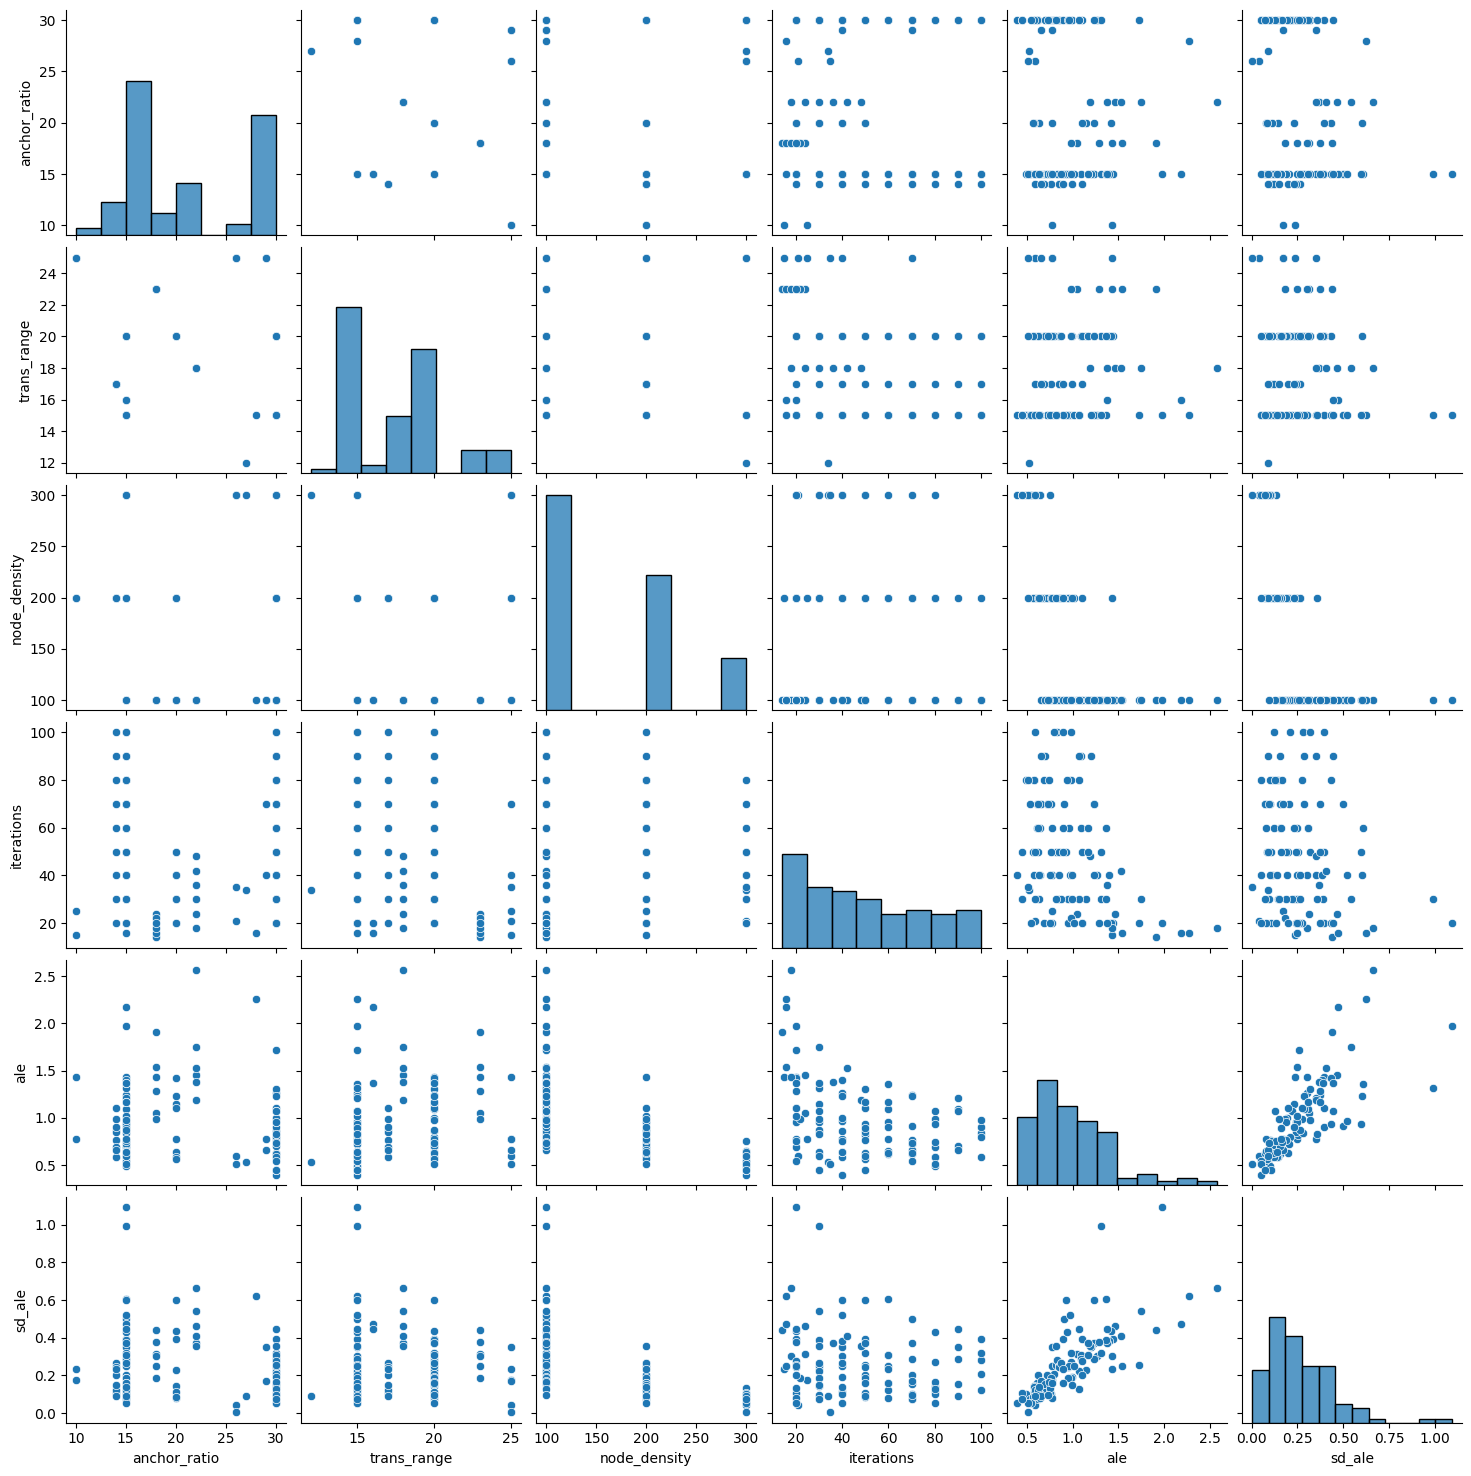

In [20]:
sns.pairplot(dataset)

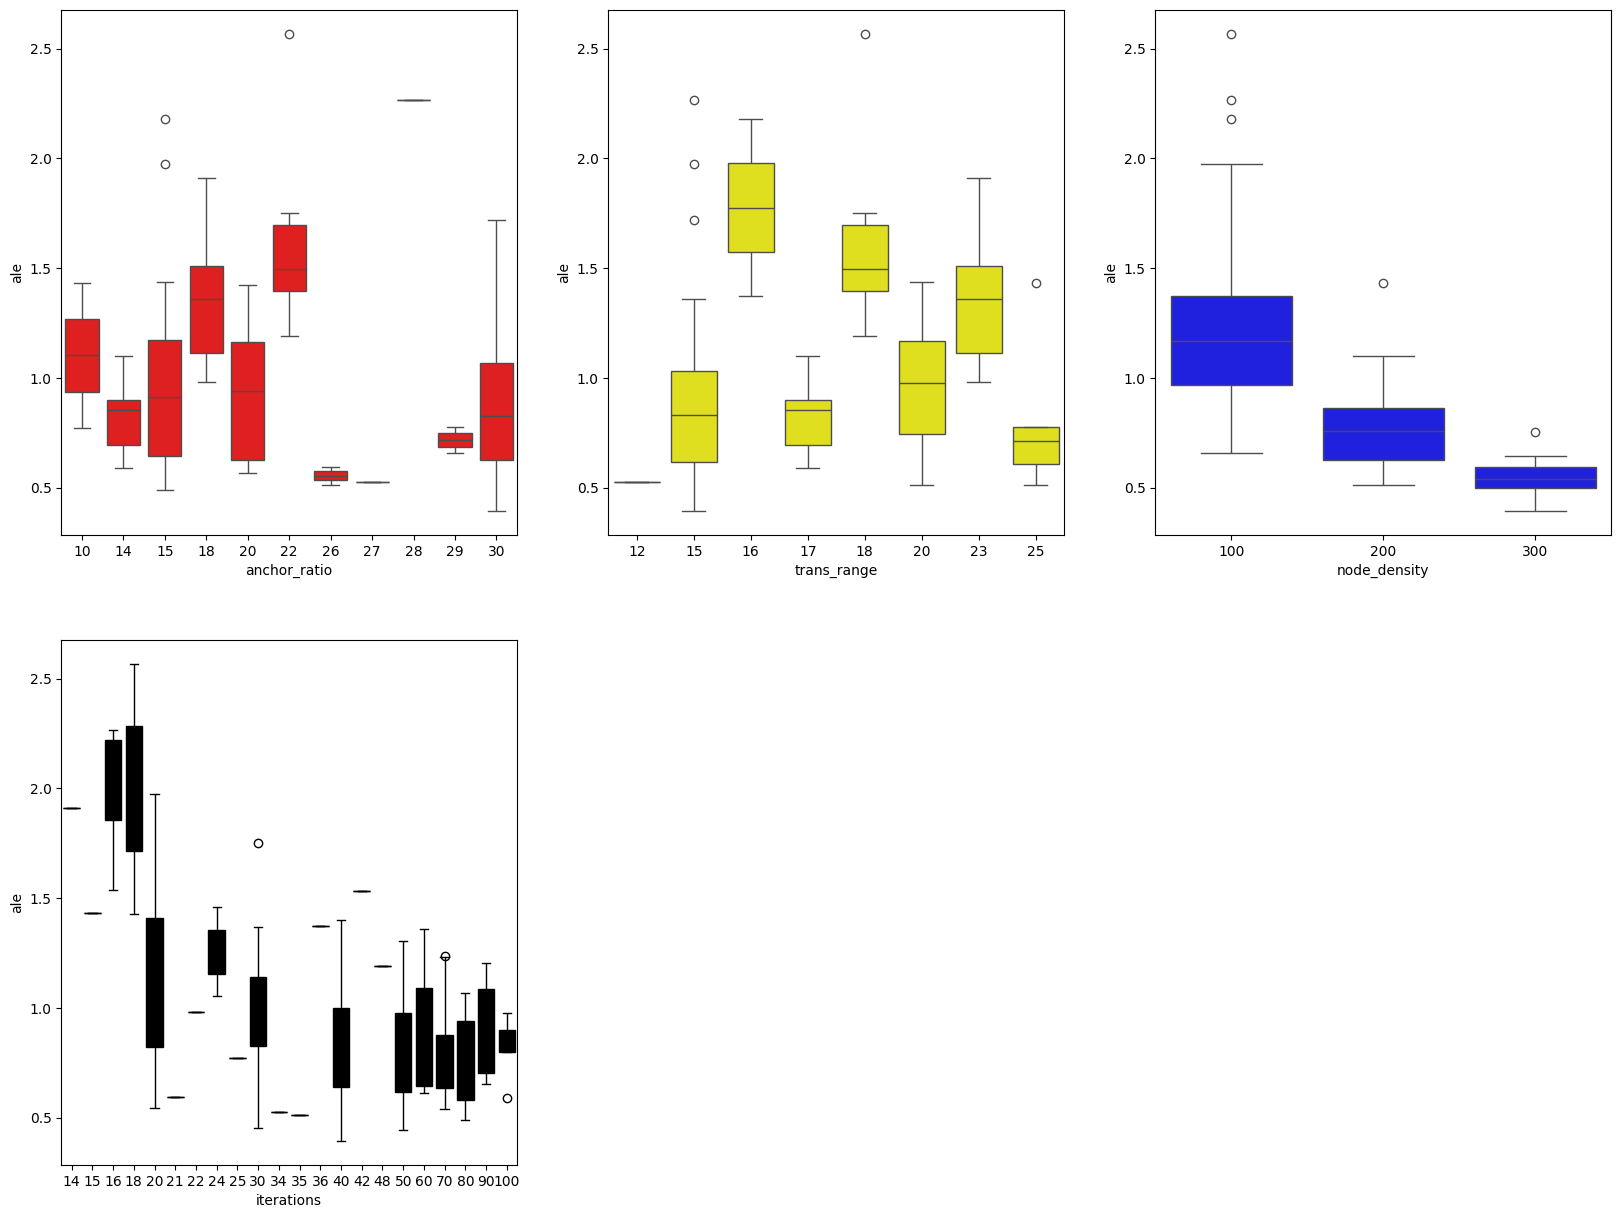

In [23]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'anchor_ratio', y = 'ale', data = dataset, color = 'red')
plt.subplot(2,3,2)
sns.boxplot(x = 'trans_range', y = 'ale', data = dataset, color = 'yellow')
plt.subplot(2,3,3)
sns.boxplot(x = 'node_density', y = 'ale', data = dataset, color = 'blue')
plt.subplot(2,3,4)
sns.boxplot(x = 'iterations', y = 'ale', data = dataset, color = 'black')
plt.subplot(2,3,4)
plt.show()

In [52]:
X = dataset[['anchor_ratio', 'trans_range', 'node_density', 'iterations']]

y = dataset['ale']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [53]:
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

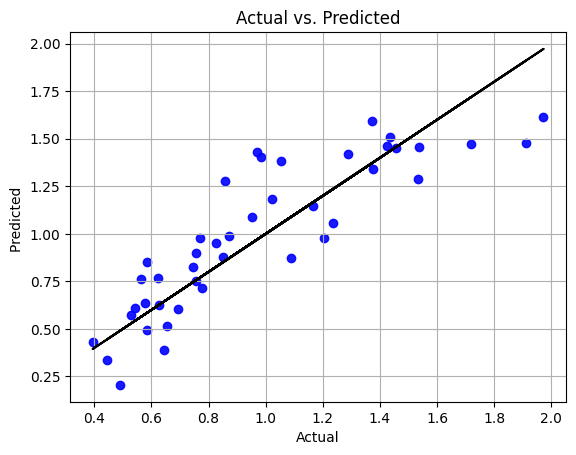

In [55]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.9)

plt.plot(y_test, y_test, color='black')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted ')
plt.grid(True)
plt.show()

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Absolute Error: ", rmse)
print("R-squared Score:", r2)
print("Mean Absolute Error: ", mae)

Mean Squared Error: 0.04230094081236732
Root Mean Absolute Error:  0.20567192519244654
R-squared Score: 0.7399343939840872
Mean Absolute Error:  0.1628576100089309


In [56]:
import pickle
pickle.dump(model, open('/content/drive/MyDrive/Colab Notebooks/dataset/OUTPUT SAVED','wb'))

In [57]:
model_loaded = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/dataset/OUTPUT SAVED', 'rb'))

In [58]:
model_loaded.predict(X_test)

array([0.97892459, 0.6049527 , 1.61258265, 1.28026831, 0.85143305,
       0.6253889 , 1.28643292, 0.87471185, 0.57273963, 0.42918923,
       0.98882356, 0.82597498, 0.8979649 , 0.87752869, 1.40351558,
       1.05642918, 1.09068371, 0.7505021 , 0.95108818, 0.976572  ,
       1.44997851, 1.47298712, 1.45803077, 0.63639039, 1.59221062,
       1.42168731, 0.49679485, 0.61090656, 1.46419066, 0.76937085,
       1.34094812, 0.51409403, 1.43086532, 0.20535011, 1.47620251,
       1.5107225 , 1.38534384, 1.14728784, 0.71624757, 0.33833057,
       0.38706744, 1.18154237, 0.76057439])

In [59]:
y_pred = model_loaded.predict(X_test)

result = r2_score(y_test, y_pred)
result

0.7399343939840872